In [1]:
# importing neccesary library
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt

In [2]:
# including data
df = pd.read_csv("Telco-Customer-Churn.csv")
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [3]:
# Checking shape of the data
df.shape

(7043, 21)

In [4]:
# Removing cusomerID and checking columns
df.drop("customerID", axis="columns", inplace=True)
df.dtypes

gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges         object
Churn                object
dtype: object

In [5]:
# checking how and which columns don't have TotalCharges value
df.loc[df.TotalCharges==" "]

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
488,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,No,Yes,Yes,Yes,No,Two year,Yes,Bank transfer (automatic),52.55,,No
753,Male,0,No,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.25,,No
936,Female,0,Yes,Yes,0,Yes,No,DSL,Yes,Yes,Yes,No,Yes,Yes,Two year,No,Mailed check,80.85,,No
1082,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.75,,No
1340,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,Yes,Yes,Yes,Yes,No,Two year,No,Credit card (automatic),56.05,,No
3331,Male,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,19.85,,No
3826,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.35,,No
4380,Female,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.00,,No
5218,Male,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,One year,Yes,Mailed check,19.70,,No
6670,Female,0,Yes,Yes,0,Yes,Yes,DSL,No,Yes,Yes,Yes,Yes,No,Two year,No,Mailed check,73.35,,No


In [6]:
# Copying remaning data in 'a'
a = df.loc[df.TotalCharges!=" "][::]

In [7]:
# Converting remaning data in to numeric
b = pd.to_numeric(a.TotalCharges)
b

0         29.85
1       1889.50
2        108.15
3       1840.75
4        151.65
         ...   
7038    1990.50
7039    7362.90
7040     346.45
7041     306.60
7042    6844.50
Name: TotalCharges, Length: 7032, dtype: float64

In [8]:
# storing it's median in fill
fill = b.median()
fill

1397.475

In [9]:
# Filling missing value with median

from sklearn.impute import SimpleImputer
si = SimpleImputer(missing_values=" ", strategy="constant", fill_value=fill)

df["TotalCharges"] = si.fit_transform([df["TotalCharges"]])[0]

In [10]:
# Changing the dtype of TotalCharges from object to numeric
df["TotalCharges"] = pd.to_numeric(df["TotalCharges"])

In [11]:
df.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
2,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [12]:
df.tenure.unique()

array([ 1, 34,  2, 45,  8, 22, 10, 28, 62, 13, 16, 58, 49, 25, 69, 52, 71,
       21, 12, 30, 47, 72, 17, 27,  5, 46, 11, 70, 63, 43, 15, 60, 18, 66,
        9,  3, 31, 50, 64, 56,  7, 42, 35, 48, 29, 65, 38, 68, 32, 55, 37,
       36, 41,  6,  4, 33, 67, 23, 57, 61, 14, 20, 53, 40, 59, 24, 44, 19,
       54, 51, 26,  0, 39], dtype=int64)

In [13]:
# Function to print object type columns with there unique values
def object_col_unique():
    for col in df.columns:
        if df[col].dtypes=="object":
            print(col,df[col].unique())

In [14]:
object_col_unique()

gender ['Female' 'Male']
Partner ['Yes' 'No']
Dependents ['No' 'Yes']
PhoneService ['No' 'Yes']
MultipleLines ['No phone service' 'No' 'Yes']
InternetService ['DSL' 'Fiber optic' 'No']
OnlineSecurity ['No' 'Yes' 'No internet service']
OnlineBackup ['Yes' 'No' 'No internet service']
DeviceProtection ['No' 'Yes' 'No internet service']
TechSupport ['No' 'Yes' 'No internet service']
StreamingTV ['No' 'Yes' 'No internet service']
StreamingMovies ['No' 'Yes' 'No internet service']
Contract ['Month-to-month' 'One year' 'Two year']
PaperlessBilling ['Yes' 'No']
PaymentMethod ['Electronic check' 'Mailed check' 'Bank transfer (automatic)'
 'Credit card (automatic)']
Churn ['No' 'Yes']


In [15]:
# Replace the No phone and internet, since in both case no connections is buyed
df.replace('No phone service',"No",inplace=True)
df.replace('No internet service',"No",inplace=True)


In [16]:
object_col_unique()

gender ['Female' 'Male']
Partner ['Yes' 'No']
Dependents ['No' 'Yes']
PhoneService ['No' 'Yes']
MultipleLines ['No' 'Yes']
InternetService ['DSL' 'Fiber optic' 'No']
OnlineSecurity ['No' 'Yes']
OnlineBackup ['Yes' 'No']
DeviceProtection ['No' 'Yes']
TechSupport ['No' 'Yes']
StreamingTV ['No' 'Yes']
StreamingMovies ['No' 'Yes']
Contract ['Month-to-month' 'One year' 'Two year']
PaperlessBilling ['Yes' 'No']
PaymentMethod ['Electronic check' 'Mailed check' 'Bank transfer (automatic)'
 'Credit card (automatic)']
Churn ['No' 'Yes']


In [17]:
# Replace Yes with 1 and No with 0
for col in df.columns:
    if df[col].dtypes=="object" and col!= "InternetService":
        df[col].replace("Yes",1,inplace=True)
        df[col].replace("No",0,inplace=True)
        

In [18]:
# One hot encoding Gender
df.gender.replace({"Female":0,"Male":1}, inplace=True)

In [19]:
df.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,0,0,1,0,1,0,0,DSL,0,1,0,0,0,0,Month-to-month,1,Electronic check,29.85,29.85,0
1,1,0,0,0,34,1,0,DSL,1,0,1,0,0,0,One year,0,Mailed check,56.95,1889.50,0
2,1,0,0,0,2,1,0,DSL,1,1,0,0,0,0,Month-to-month,1,Mailed check,53.85,108.15,1
3,1,0,0,0,45,0,0,DSL,1,0,1,1,0,0,One year,0,Bank transfer (automatic),42.30,1840.75,0
4,0,0,0,0,2,1,0,Fiber optic,0,0,0,0,0,0,Month-to-month,1,Electronic check,70.70,151.65,1


In [20]:
object_col_unique()

InternetService ['DSL' 'Fiber optic' 'No']
Contract ['Month-to-month' 'One year' 'Two year']
PaymentMethod ['Electronic check' 'Mailed check' 'Bank transfer (automatic)'
 'Credit card (automatic)']


In [21]:
# Creating Dummies for rest of columns
df2 = pd.get_dummies(data=df , columns=['InternetService', 'Contract', 'PaymentMethod'])
df2

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,OnlineSecurity,OnlineBackup,DeviceProtection,...,InternetService_DSL,InternetService_Fiber optic,InternetService_No,Contract_Month-to-month,Contract_One year,Contract_Two year,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,0,0,1,0,1,0,0,0,1,0,...,1,0,0,1,0,0,0,0,1,0
1,1,0,0,0,34,1,0,1,0,1,...,1,0,0,0,1,0,0,0,0,1
2,1,0,0,0,2,1,0,1,1,0,...,1,0,0,1,0,0,0,0,0,1
3,1,0,0,0,45,0,0,1,0,1,...,1,0,0,0,1,0,1,0,0,0
4,0,0,0,0,2,1,0,0,0,0,...,0,1,0,1,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,1,0,1,1,24,1,1,1,0,1,...,1,0,0,0,1,0,0,0,0,1
7039,0,0,1,1,72,1,1,0,1,1,...,0,1,0,0,1,0,0,1,0,0
7040,0,0,1,1,11,0,0,1,0,0,...,1,0,0,1,0,0,0,0,1,0
7041,1,1,1,0,4,1,1,0,0,0,...,0,1,0,1,0,0,0,0,0,1


In [22]:
# Scaling data in range 0 to 1
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
col = ['tenure', 'TotalCharges', 'MonthlyCharges']
df2[col] = scaler.fit_transform(df2[col])

In [23]:
df2

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,OnlineSecurity,OnlineBackup,DeviceProtection,...,InternetService_DSL,InternetService_Fiber optic,InternetService_No,Contract_Month-to-month,Contract_One year,Contract_Two year,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,0,0,1,0,0.013889,0,0,0,1,0,...,1,0,0,1,0,0,0,0,1,0
1,1,0,0,0,0.472222,1,0,1,0,1,...,1,0,0,0,1,0,0,0,0,1
2,1,0,0,0,0.027778,1,0,1,1,0,...,1,0,0,1,0,0,0,0,0,1
3,1,0,0,0,0.625000,0,0,1,0,1,...,1,0,0,0,1,0,1,0,0,0
4,0,0,0,0,0.027778,1,0,0,0,0,...,0,1,0,1,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,1,0,1,1,0.333333,1,1,1,0,1,...,1,0,0,0,1,0,0,0,0,1
7039,0,0,1,1,1.000000,1,1,0,1,1,...,0,1,0,0,1,0,0,1,0,0
7040,0,0,1,1,0.152778,0,0,1,0,0,...,1,0,0,1,0,0,0,0,1,0
7041,1,1,1,0,0.055556,1,1,0,0,0,...,0,1,0,1,0,0,0,0,0,1


In [24]:
# Spliting data
from sklearn.model_selection import train_test_split
X = df2.drop(["Churn"], axis="columns")
y = df2["Churn"]

In [25]:
 X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1)

In [26]:
import tensorflow as tf
from tensorflow import keras

In [27]:
X.shape

(7043, 26)

In [28]:
# Creating our model
model = keras.Sequential([
    keras.layers.Dense(50, input_shape=(26,), activation="relu"),
    keras.layers.Dense(1, activation="sigmoid")
])


In [29]:
model.compile(optimizer="adam", loss="binary_crossentropy", metrics=["accuracy"])

model.fit(X_train, y_train, epochs=100)

Epoch 1/100
155/155 [==============================] - 1s 1ms/step - loss: 0.5199 - accuracy: 0.7361
Epoch 2/100
155/155 [==============================] - 0s 1ms/step - loss: 0.4421 - accuracy: 0.7915
Epoch 3/100
155/155 [==============================] - 0s 1ms/step - loss: 0.4337 - accuracy: 0.7970
Epoch 4/100
155/155 [==============================] - 0s 1ms/step - loss: 0.4306 - accuracy: 0.8002
Epoch 5/100
155/155 [==============================] - 0s 1ms/step - loss: 0.4279 - accuracy: 0.8024
Epoch 6/100
155/155 [==============================] - 0s 1ms/step - loss: 0.4259 - accuracy: 0.8051
Epoch 7/100
155/155 [==============================] - 0s 1ms/step - loss: 0.4256 - accuracy: 0.8037
Epoch 8/100
155/155 [==============================] - 0s 1ms/step - loss: 0.4237 - accuracy: 0.8069
Epoch 9/100
155/155 [==============================] - 0s 1ms/step - loss: 0.4218 - accuracy: 0.8032
Epoch 10/100
155/155 [==============================] - 0s 989us/step - loss: 0.4199 - accu

155/155 [==============================] - 0s 1ms/step - loss: 0.3720 - accuracy: 0.8227
Epoch 82/100
155/155 [==============================] - 0s 1ms/step - loss: 0.3704 - accuracy: 0.8260
Epoch 83/100
155/155 [==============================] - 0s 1ms/step - loss: 0.3716 - accuracy: 0.8268
Epoch 84/100
155/155 [==============================] - 0s 1ms/step - loss: 0.3701 - accuracy: 0.8245
Epoch 85/100
155/155 [==============================] - 0s 1ms/step - loss: 0.3712 - accuracy: 0.8260
Epoch 86/100
155/155 [==============================] - 0s 1ms/step - loss: 0.3691 - accuracy: 0.8254
Epoch 87/100
155/155 [==============================] - 0s 1ms/step - loss: 0.3703 - accuracy: 0.8288
Epoch 88/100
155/155 [==============================] - 0s 1ms/step - loss: 0.3693 - accuracy: 0.8235
Epoch 89/100
155/155 [==============================] - 0s 1ms/step - loss: 0.3695 - accuracy: 0.8266
Epoch 90/100
155/155 [==============================] - 0s 1ms/step - loss: 0.3690 - accuracy: 

In [30]:
# Checking accuracy
model.evaluate(X_test, y_test)

67/67 [==============================] - 0s 991us/step - loss: 0.4210 - accuracy: 0.7993


[0.4210043251514435, 0.7993374466896057]

In [31]:
yp = model.predict(X_test)
yp

67/67 [==============================] - 0s 781us/step


array([[0.06672919],
       [0.21409734],
       [0.20895311],
       ...,
       [0.4412286 ],
       [0.22279707],
       [0.00142991]], dtype=float32)

In [32]:
# Changing probabilty to binary
y_predict = []
for i in yp:
    if i>=0.5:
        y_predict.append(1)
    else:
        y_predict.append(0)
        
y_predict[:5]

[0, 0, 0, 1, 0]

In [33]:
from sklearn.metrics import confusion_matrix, classification_report

print(classification_report(y_test,y_predict))

              precision    recall  f1-score   support

           0       0.85      0.88      0.87      1585
           1       0.61      0.55      0.58       528

    accuracy                           0.80      2113
   macro avg       0.73      0.72      0.72      2113
weighted avg       0.79      0.80      0.80      2113



Text(95.72222222222221, 0.5, 'True')

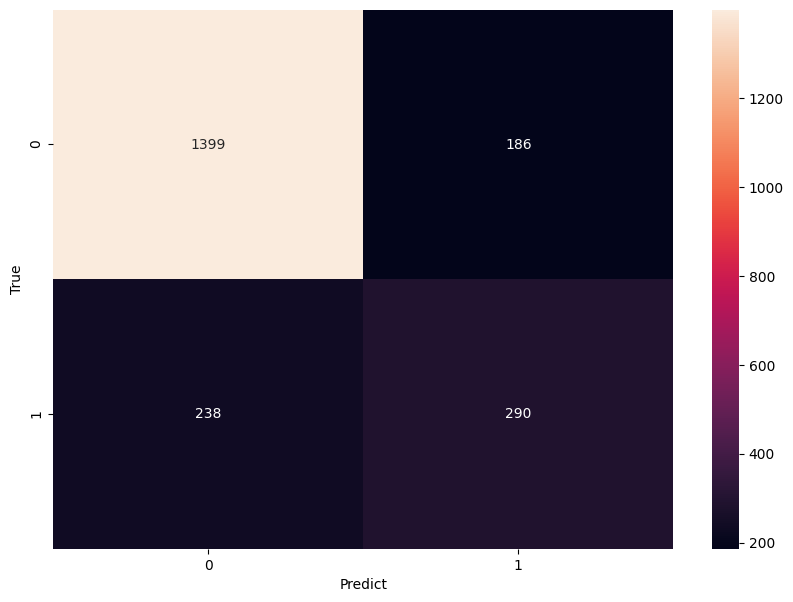

In [34]:
# Confusion matrix for better interpretiion
import seaborn as sb
cm = tf.math.confusion_matrix(labels=y_test, predictions= y_predict)

plt.figure(figsize=(10,7))
sb.heatmap(cm,annot=True, fmt="d")
plt.xlabel("Predict")
plt.ylabel("True")